In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv("final-dataset.csv")

In [ ]:
df.head()


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
#unnecessary columns (low predictive features)
df = df.drop(columns=['ID', 'ethnicity', 'contry_of_res', 'used_app_before', 'relation'])

KeyError: "['ID', 'ethnicity', 'contry_of_res', 'used_app_before', 'relation'] not found in axis"

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,result,age_desc,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,no,no,6.351166,18 and more,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,no,no,2.255185,18 and more,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,no,yes,14.851484,18 and more,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,no,no,2.276617,18 and more,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,no,no,-4.777286,18 and more,0


In [ ]:
df['Class/ASD'] = df['Class/ASD'].replace({'YES': 1, 'NO': 0})
df["Class/ASD"] = df["Class/ASD"].astype(int)
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,680
1,224


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,0.579646,0.530973,0.473451,0.448009,0.435841,0.357301,0.411504,0.521018,0.528761,0.621681,26.804971,8.328366,0.247788
std,0.493889,0.499316,0.499571,0.497565,0.496141,0.479470,0.492379,0.499835,0.499448,0.485236,16.018213,4.619565,0.431967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.285254,5.311872,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,22.674733,9.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.721743,12.245695,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [ ]:
df['age_desc'] = df['age_desc'].replace({'12-15 years': '12-16 years'})

In [ ]:
df["age_desc"]

,age_desc
0,18 and more
1,18 and more
2,18 and more
3,18 and more
4,18 and more
...,...
899,12-16 years
900,12-16 years
901,12-16 years
902,12-16 years


In [ ]:
#my desired theme for plotting graphs
sns.set_theme(style="darkgrid")

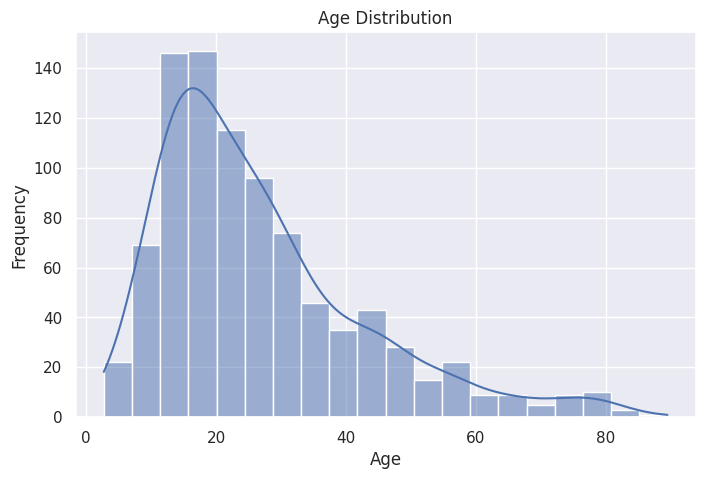

In [ ]:
#plot histogram(dsitribution of ages)
#kde for the smooth density curve
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

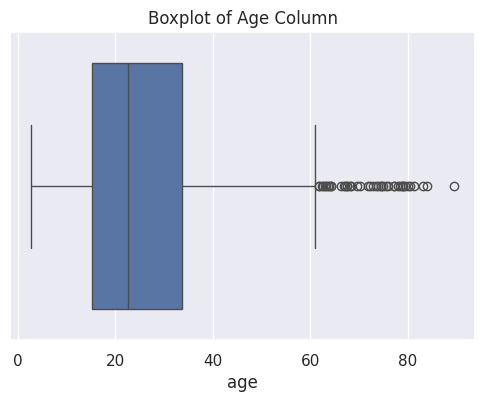

In [ ]:
# Boxplot to check outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['age'])
plt.title("Boxplot of Age Column")
plt.show()

##from the boxplot above, we have many outliers and we have to handle them by using any method like iqr,capping or z score.
Our data is mainly spread into 10-60 years of age
The median is 20-30 years
Outliers are above 60 years

In [ ]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")
print(outliers[['age']])  # Display outlier rows


Number of Outliers: 43
           age
19   72.838871
31   74.870511
33   67.008192
41   74.534509
92   75.878608
93   79.435739
161  79.112763
231  69.537553
238  64.267854
241  64.350899
262  78.411410
264  78.839500
282  63.751842
320  77.149980
344  68.272799
347  62.519671
348  81.190656
352  73.846642
354  80.060843
359  67.082565
440  63.671425
441  73.543137
450  63.033651
460  74.487303
461  79.111022
496  70.272726
508  68.244181
521  61.703198
522  67.539531
529  61.860473
535  83.204994
582  72.305653
596  75.435646
654  89.461718
656  63.195690
674  67.563262
698  62.382337
705  83.978179
714  71.761540
717  77.928328
722  77.210617
747  66.336106
756  80.544085


we are having 43 outliers in our "age" column (>60)
if use iqr method,Removing 43 data points might affect our models accuracy
Hence using capping->Values below 1st percentile are set to the 1st percentile value.
Values above 99th percentile are set to the 99th percentile value.
No data is removed—just adjusted!

**handling "Age" outliers**

In [ ]:
#capping for data (preserves data while reduces the defualt of extreme values)
lower_bound = df["age"].quantile(0.05)  # 1st percentile
upper_bound = df["age"].quantile(0.95)  # 99th percentile

# Apply capping
df["age"] = np.where(df["age"] < lower_bound, lower_bound, df["age"])
df["age"] = np.where(df["age"] > upper_bound, upper_bound, df["age"])

# Display summary
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(df["age"].describe())

Lower Bound: 8.9593965826, Upper Bound: 59.9451197259999
count    904.000000
mean      26.328402
std       14.261345
min        8.959397
25%       15.285254
50%       22.674733
75%       33.721743
max       59.945120
Name: age, dtype: float64


visualizing the effect of capping


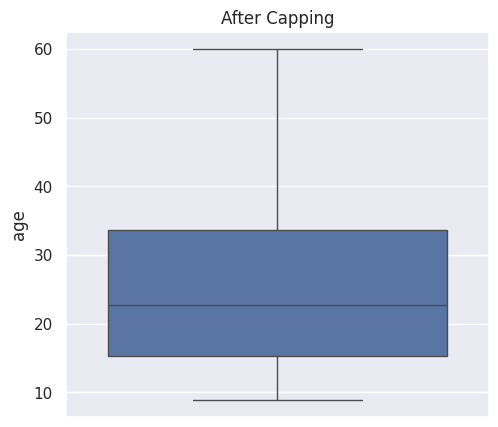

In [ ]:
df_capped = df.copy()

# Define capping limits
lower_bound = df_capped["age"].quantile(0.01)  # 1st percentile
upper_bound = df_capped["age"].quantile(0.99)  # 99th percentile

# Apply capping
df_capped["age"] = np.where(df_capped["age"] < lower_bound, lower_bound, df_capped["age"])
df_capped["age"] = np.where(df_capped["age"] > upper_bound, upper_bound, df_capped["age"])

# Plot Before and After Boxplots
plt.figure(figsize=(12, 5))

# After Capping
plt.subplot(1, 2, 2)
sns.boxplot(y=df_capped["age"])
plt.title("After Capping")

plt.show()


Analyzing "result" column

In [ ]:
print(df["result"].value_counts())  # Count of unique values
print(df["result"].describe())  # Summary statistics
print(df["result"].isnull().sum())  # Check for missing values

result
8.000000     22
9.000000     19
7.000000     17
6.000000     16
4.000000     10
             ..
15.066247     1
12.103428     1
13.599779     1
8.070766      1
2.248390      1
Name: count, Length: 810, dtype: int64
count    904.000000
mean       8.328366
std        4.619565
min       -6.137748
25%        5.311872
50%        9.000000
75%       12.245695
max       15.853126
Name: result, dtype: float64
0


checking for outliers in "result"

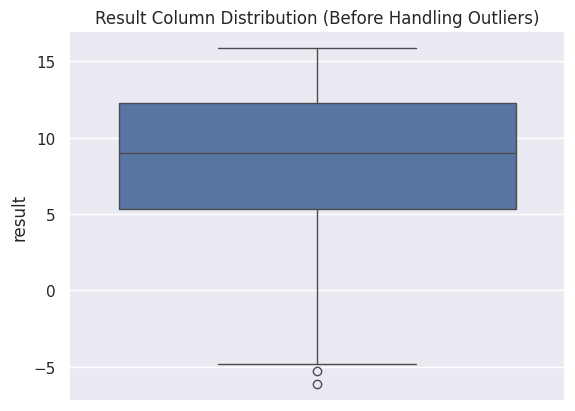

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df["result"])
plt.title("Result Column Distribution (Before Handling Outliers)")
plt.show()


using capping

In [ ]:
lower_bound = df["result"].quantile(0.01)  # 1st percentile
upper_bound = df["result"].quantile(0.99)  # 99th percentile

df["result"] = np.where(df["result"] < lower_bound, lower_bound, df["result"])
df["result"] = np.where(df["result"] > upper_bound, upper_bound, df["result"])


visulaizing after capping "result"

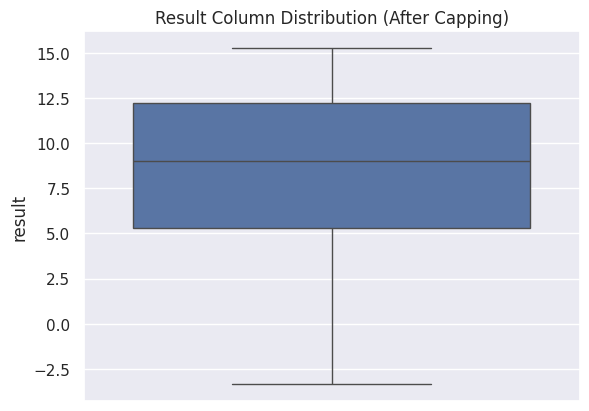

In [ ]:
sns.boxplot(y=df["result"])
plt.title("Result Column Distribution (After Capping)")
plt.show()

now for encoding(textual data to numerical data)

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['gender', 'jaundice', 'austim', 'age_desc'], dtype='object')


 Encoding Plan
1. gender → Label Encoding ('F' -> 0, 'M' -> 1)
2. jaundice & austim → Label Encoding ('No' -> 0, 'Yes' -> 1)
3. age_desc → Ordinal Encoding (for ranking wise)(since "12-16 years" and "18 and more" have an order)

"12-16 years" -> 1
"18 and more" -> 2

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'gender' (F -> 0, M -> 1)
df["gender"] = label_encoder.fit_transform(df["gender"])

# Encode 'jaundice' & 'austim' (No -> 0, Yes -> 1)
for col in ["jaundice", "austim"]:
    df[col] = label_encoder.fit_transform(df[col])

# Encode 'age_desc' as an ordered category
age_mapping = {"12-16 years": 1, "18 and more": 2}
df["age_desc"] = df["age_desc"].map(age_mapping)

# Display first few rows
print(df.head())


   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         0         1         0         1         0         1   
1         0         0         0         0         0         0         0   
2         1         1         1         1         1         1         1   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score        age  gender  jaundice  austim  \
0         0         1          1  38.172746       0         0       0   
1         0         0          0  47.750517       1         0       0   
2         1         1          1   8.959397       1         0       1   
3         0         0          0  23.561927       0         0       0   
4         0         0          0  43.205790       1         0       0   

      result  age_desc  Class/ASD  
0   6.351166         2          0  
1   2.255185         2          0  
2 

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index([], dtype='object')


In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,result,age_desc,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,0,0,6.351166,2,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,0,0,2.255185,2,0
2,1,1,1,1,1,1,1,1,1,1,8.959397,1,0,1,14.851484,2,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,0,0,2.276617,2,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,0,0,-3.357159,2,0


**Choosing a scalar (minmax or standard scalar)**

checking if data is normally distributed?

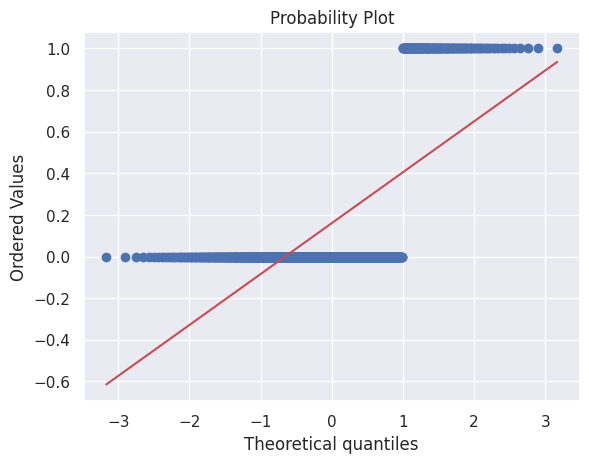

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df["austim"], dist="norm", plot=plt)
plt.show()


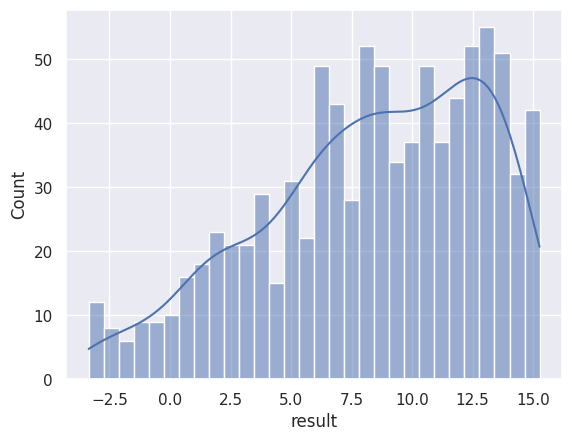

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["result"], kde=True, bins=30)
plt.show()


Hence our data is not normally distributed, so we have to use min-max scalar(normalization) for scaliang

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)  # Applies Min-Max Scaling to all numeric columns
print(df_scaled.min(), df_scaled.max())


0.0 1.0


In [ ]:
import pandas as pd
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled_df.describe())


         A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  904.000000  904.000000  904.000000  904.000000  904.000000  904.000000   
mean     0.579646    0.530973    0.473451    0.448009    0.435841    0.357301   
std      0.493889    0.499316    0.499571    0.497565    0.496141    0.479470   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         age      gender  \
count  904.000000  904.000000  904.000000  904.000000  904.000000  904.000000   
mean     0.411504    0.521018    0.528761    0.621681    0.340664    0.641593   
std      0.492379    0.4998

our data is between 0 and 1 now

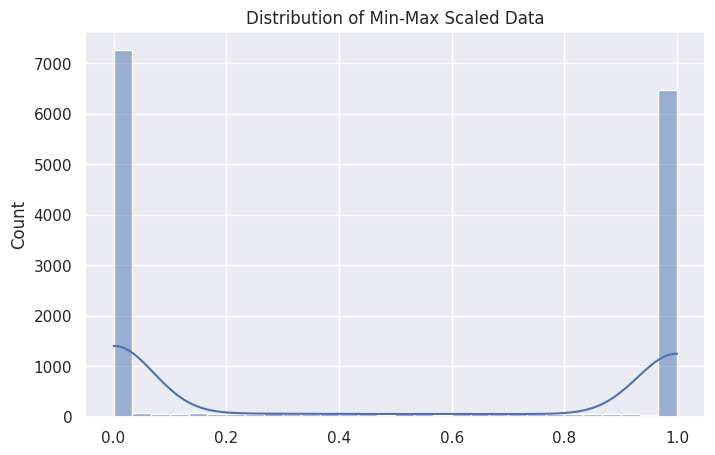

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_scaled.flatten(), bins=30, kde=True)
plt.title("Distribution of Min-Max Scaled Data")
plt.show()


**Feature Scaling**

we need to ensure we’re using the most relevant features. Irrelevant or redundant features can reduce model performance.

visulaizing the relation between the features, if 2 features are greatly correlated, drop one of them

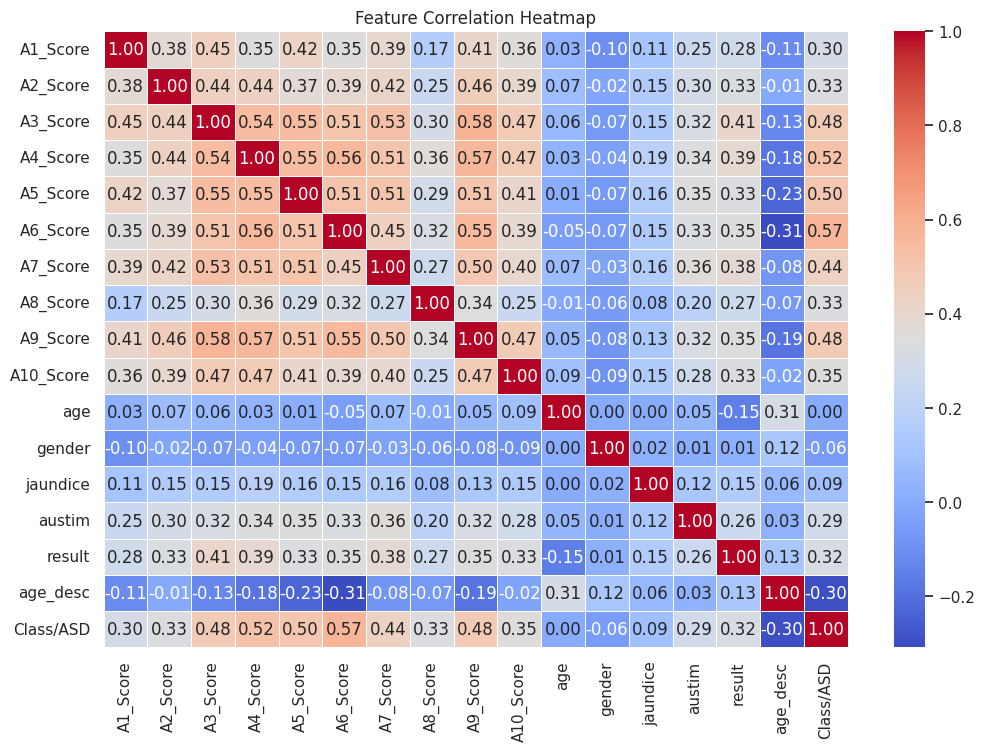

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12,8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Feature Correlation Heatmap")
plt.show()


every feature is not that corelated with each other, but a1 to a9 f sores are realted but cant be removed as they help for predticion mainily

**Trainig and Testing data**

teps for Train-Test Split
⃣ Define Input (X) and Target (y)

X → All relevant features (A1_Score to A10_Score, age, gender, jaundice, austim, result, age_desc)
y → Target column (Class/ASD)

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Class/ASD'])  # Drop target column
y = df['Class/ASD']  # Target column

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (723, 16)
X_test shape: (181, 16)
y_train shape: (723,)
y_test shape: (181,)


checking if our dataset requires smote

In [ ]:
from collections import Counter

# Check class distribution
print("Class distribution:", Counter(y))

Class distribution: Counter({0: 680, 1: 224})


Imbalance Ratio=
224/
680
​=3.03
Since the imbalance ratio > 3, SMOTE is strongly recommended.

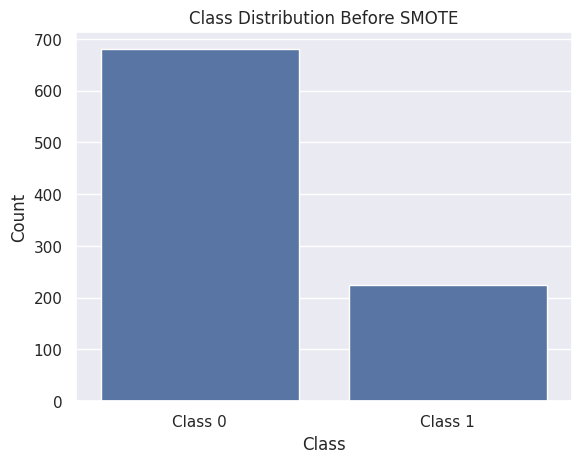

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
sns.barplot(x=['Class 0', 'Class 1'], y=[680, 224])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution Before SMOTE")
plt.show()


In [ ]:
imbalance_ratio = 680 / 224
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


Imbalance Ratio: 3.04


Applying smote

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 1.0 means equal class distribution

# Apply SMOTE on the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(f"New Class Distribution: {Counter(y_resampled)}")


New Class Distribution: Counter({0: 680, 1: 680})


training and testing data split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Split before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only on training data
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"New Class Distribution (Train Set): {Counter(y_train_resampled)}")  # Should be balanced


New Class Distribution (Train Set): Counter({1: 544, 0: 544})


In [ ]:
from imblearn.over_sampling import SMOTE

# Ensure X_train and y_train are properly defined before applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Also ensure you have a scaled version for SVM and KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # For SVM and KNN


In [ ]:
cv_results = {}

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters...")

    # Use scaled data only for SVM and KNN, otherwise use X_train_smote
    if model_name in ["SVM", "KNN"]:
        X_train_used = X_train_scaled
        y_train_used = y_train  # Use original labels for these models
    else:
        X_train_used = X_train_smote
        y_train_used = y_train_smote

    y_pred = cross_val_predict(model, X_train_used, y_train_used, cv=5)

    accuracy = accuracy_score(y_train_used, y_pred)
    precision = precision_score(y_train_used, y_pred)
    recall = recall_score(y_train_used, y_pred)
    f1 = f1_score(y_train_used, y_pred)

    cv_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")
    print("-" * 60)

import pandas as pd
cv_results_df = pd.DataFrame(cv_results).T
print(cv_results_df)


Training Decision Tree with default parameters...
Decision Tree - Accuracy: 0.85, Precision: 0.84, Recall: 0.86, F1-score: 0.85
------------------------------------------------------------
Training Random Forest with default parameters...
Random Forest - Accuracy: 0.91, Precision: 0.87, Recall: 0.96, F1-score: 0.91
------------------------------------------------------------
Training XGBoost with default parameters...
XGBoost - Accuracy: 0.89, Precision: 0.86, Recall: 0.93, F1-score: 0.89
------------------------------------------------------------
Training KNN with default parameters...
KNN - Accuracy: 0.84, Precision: 0.64, Recall: 0.78, F1-score: 0.71
------------------------------------------------------------
Training SVM with default parameters...
SVM - Accuracy: 0.88, Precision: 0.74, Recall: 0.77, F1-score: 0.76
------------------------------------------------------------
               Accuracy  Precision    Recall  F1-score
Decision Tree  0.849265   0.839286  0.863971  0.8514

**Hyperparameter tuning**

1.gridsearchCV

In [72]:
#decison tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best accuracy:", grid_dt.best_score_)


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best accuracy: 0.8589559386973182


In [100]:
#random forest
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best accuracy:", grid_rf.best_score_)


KeyboardInterrupt: 

In [71]:
#xgboost
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.5, 0.7, 1.0]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best accuracy:", grid_xgb.best_score_)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1.0}
Best accuracy: 0.8699329501915709


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:49:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [74]:
#knn
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)
print("Best accuracy:", grid_knn.best_score_)


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy: 0.8408716475095787


In [82]:
#svm
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)
print("Best parameters for SVM:", grid_svm.best_params_)
print("Best accuracy:", grid_svm.best_score_)


KeyboardInterrupt: 

2.randomizedsearchCV

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_dt = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_dist_dt,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Best accuracy:", random_search_dt.best_score_)


Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}
Best accuracy: 0.8534099616858237


In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [200, 300, 500],  # More trees
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]  # This should be inside param_grid
}

# Randomized Search with 10 iterations
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(), param_distributions=param_grid_rf,
    n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Display best parameters and accuracy
print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best accuracy:", random_search_rf.best_score_)


Best parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Best accuracy: 0.865852490421456


In [79]:
from xgboost import XGBClassifier

param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_dist_xgb,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("Best accuracy:", random_search_xgb.best_score_)


Best parameters for XGBoost: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5}
Best accuracy: 0.8783429118773945


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:55:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [80]:
from sklearn.neighbors import KNeighborsClassifier

param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

random_search_knn = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_dist_knn,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_knn.fit(X_train_scaled, y_train)  # Use scaled data for KNN
print("Best parameters for KNN:", random_search_knn.best_params_)
print("Best accuracy:", random_search_knn.best_score_)


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}
Best accuracy: 0.8561398467432951


In [81]:
from sklearn.svm import SVC

param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

random_search_svm = RandomizedSearchCV(
    SVC(),
    param_dist_svm,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_svm.fit(X_train_scaled, y_train)  # Use scaled data for SVM
print("Best parameters for SVM:", random_search_svm.best_params_)
print("Best accuracy:", random_search_svm.best_score_)


Best parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}
Best accuracy: 0.8714080459770116


optimizing xg boost(ranomdsearch cv)

In [83]:
from sklearn.svm import SVC

param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

random_search_svm = RandomizedSearchCV(
    SVC(),
    param_dist_svm,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_svm.fit(X_train_scaled, y_train)  # Use scaled data for SVM
print("Best parameters for SVM:", random_search_svm.best_params_)
print("Best accuracy:", random_search_svm.best_score_)


Best parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}
Best accuracy: 0.8714080459770116


In [89]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist_svm_fine = {
    'C': [0.5, 1, 2, 5],
    'gamma': [0.05, 0.1, 0.2, 0.5],
    'kernel': ['rbf']
}

# Initialize SVM model
svm_model = SVC()

# Perform Randomized Search
random_search_svm = RandomizedSearchCV(
    svm_model, param_distributions=param_dist_svm,
    n_iter=30, scoring='accuracy', cv=5, verbose=2,
    n_jobs=-1, random_state=42
)

# Fit model
random_search_svm.fit(X_train_scaled, y_train)

# Print best parameters and accuracy
print("Best Parameters for SVM:", random_search_svm.best_params_)
print("Best Accuracy for SVM:", random_search_svm.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
Best Accuracy for SVM: 0.8838409961685825


In [91]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

# Define best models manually from previous tuning results
best_svm = SVC(kernel='rbf', gamma=0.1, C=1, probability=True)  # Ensure `probability=True` for stacking
best_xgb = XGBClassifier(random_state=42)  # If you tuned XGBoost, use its best parameters

# Stacking Classifier
stacked_model = StackingClassifier(
    estimators=[('svm', best_svm), ('xgb', best_xgb)],
    final_estimator=RandomForestClassifier(random_state=42)
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the stacked model
accuracy = stacked_model.score(X_test, y_test)
print(f"Stacked Model Accuracy: {accuracy:.4f}")


Stacked Model Accuracy: 0.8398


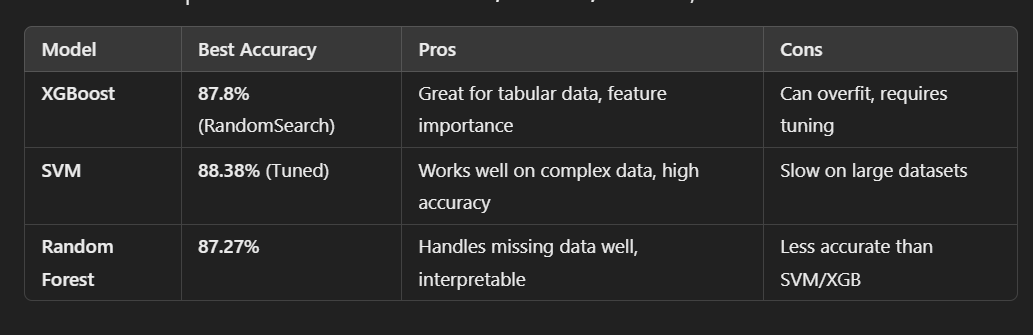

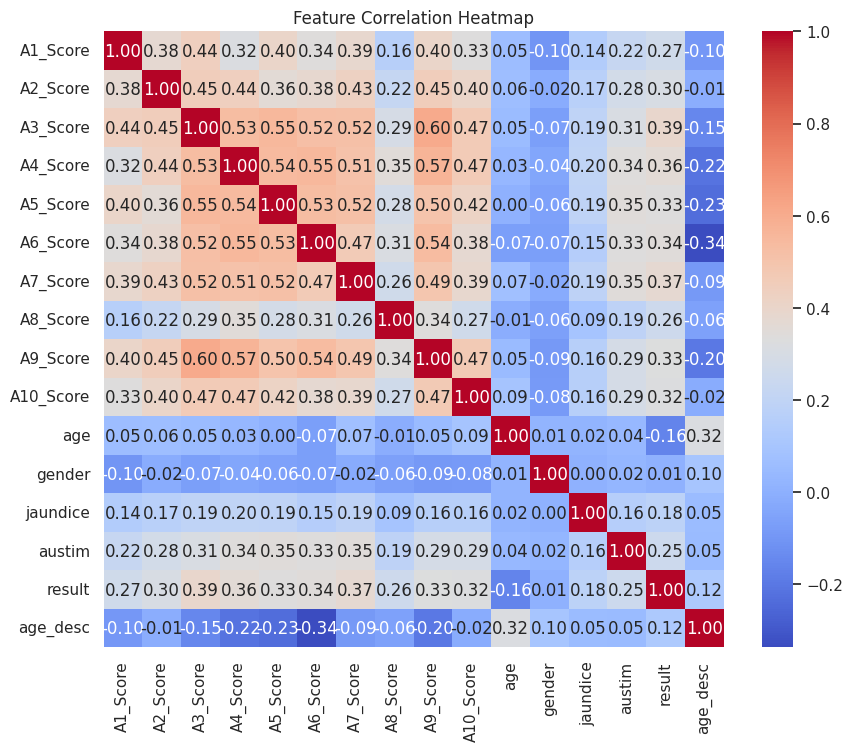

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


trying PCA

In [93]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train model
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Compare accuracy
print("Accuracy with PCA:", accuracy_score(y_test, y_pred_pca))


Accuracy with PCA: 0.7624309392265194


no use of pca :(

svm with best params

In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist_svm_fine = {
    'C': [0.5, 1, 2, 5],
    'gamma': [0.05, 0.1, 0.2, 0.5],
    'kernel': ['rbf']
}

# Initialize SVM model
svm_model = SVC()

# Perform Randomized Search
random_search_svm = RandomizedSearchCV(
    svm_model, param_distributions=param_dist_svm,
    n_iter=30, scoring='accuracy', cv=5, verbose=2,
    n_jobs=-1, random_state=42
)

# Fit model
random_search_svm.fit(X_train_scaled, y_train)

# Print best parameters and accuracy
print("Best Parameters for SVM:", random_search_svm.best_params_)
print("Best Accuracy for SVM:", random_search_svm.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
Best Accuracy for SVM: 0.8838409961685825


Random Forest (Default Parameters) → 91% Accuracy
SVM (Hyperparameter Tuned) → 88.8% Accuracy